# CSE 275 3D DL HW1:

# 1 Rotation

1.1: 

$$\frac{(p+q)}{2} = \frac{1}{\sqrt{2}} + \frac{i}{2\sqrt{2}} + \frac{j}{2\sqrt{2}}, |\frac{(p+q)}{2}| = \frac{\sqrt{3}}{2} $$
$$r_0 = \frac{2}{\sqrt{3}} \cdot \frac{p+q}{2} = \frac{\sqrt{6}}{3} + \frac{\sqrt{6}}{6}i + \frac{\sqrt{6}}{6}j, |r_0|=1$$
$$M(r_0) = \left[ 
    \begin{array}{ccc}
    \frac{2}{3} & \frac{1}{3} & \frac{2}{3} \\ 
    \frac{1}{3} & \frac{2}{3} & \frac{-2}{3} \\ 
    \frac{-2}{3} & \frac{2}{3} & \frac{1}{3} 
    \end{array} 
    \right] $$
By eigen-decomposition, we have eigen-vector $r = [1 \quad 1 \quad 0] ^T$ for $\lambda_1 = 1$. Hence, $r$ is the rotation axis.

$$tr(M)=\frac{3}{5}=1+2\cos{\theta} => \theta = \arccos{\frac{1}{3}} \approx 70.5^{\circ}$$ 


1.2:
$$w_p = [1 \space 0 \space 0] ^T, \theta_p = \frac{\pi}{2}, w_q = [0 \space 1 \space 0]^T, \theta_q = \frac{\pi}{2} $$
So the exponential coordinates for $p$ ($\overrightarrow{w_p}$) and $q$ ($\overrightarrow{w_q}$) are:
$$ \overrightarrow{w_p} = w_p \theta_p = [\frac{\pi}{2} \space 0 \space 0]^T, \overrightarrow{w_q} = w_q \theta_q = [0 \space \frac{\pi}{2} \space 0]^T $$

1.3.a:

$$[w_p] = \left[ 
    \begin{array}{ccc}
    0 & 0 & 0 \\ 
    0 & 0 & -1 \\ 
    0 & 1 & 0 
    \end{array} 
    \right], 
    \theta_p = \frac{\pi}{2}, \\
    [w_q] = \left[ 
    \begin{array}{ccc}
    0 & 0 & 1 \\ 
    0 & 0 & 0 \\ 
    -1 & 0 & 0 
    \end{array} 
    \right], 
    \theta_q = \frac{\pi}{2} $$

$$ Rot(w_p, \theta_p) = e^{[w_p]\theta_p} \approx I + [w_p]\sin{\theta_p} + [w_p]^2(1-\cos{\theta_p}) \\
            = \left[ 
            \begin{array}{ccc}
            1 & 0 & 0 \\ 
            0 & 0 & -1 \\ 
            0 & 1 & 0 
            \end{array} 
            \right] \\
    
    Rot(w_q, \theta_q) = e^{[w_q]\theta_q} \approx I + [w_q]\sin{\theta_q} + [w_q]^2(1-\cos{\theta_q}) \\
            = \left[ 
            \begin{array}{ccc}
            0 & 0 & 1 \\ 
            0 & 1 & 0 \\ 
            -1 & 0 & 0 
            \end{array} 
            \right] 

$$

1.3.b:
$$
[w_p] + [w_q] = \left[ 
    \begin{array}{ccc}
    0 & 0 & 1 \\ 
    0 & 0 & -1 \\ 
    -1 & 1 & 0 
    \end{array} 
    \right], \\
    
exp(([w_p] + [w_q])\frac{\pi}{2}) \approx I + [w_p] + [w_q] + ([w_p] + [w_q])^2 \\
       = \left[ 
            \begin{array}{ccc}
            0 & 1 & 1 \\ 
            1 & 0 & -1 \\ 
            -1 & 1 & -1 
            \end{array} 
            \right], \\

exp([w_p]\frac{\pi}{2})exp([w_q]\frac{\pi}{2}) = \left[ 
            \begin{array}{ccc}
            0 & 0 & 1 \\ 
            1 & 0 & 0 \\ 
            0 & 1 & 0 
            \end{array} 
            \right] \neq exp(([w_p] + [w_q])\frac{\pi}{2}) \\

=> exp(([w_p] + [w_q])) \neq exp([w_p])exp([w_q]), \space proved
    
$$

1.3.c.i


The objective:


$$
\begin{aligned}


& || R(I+[\Delta w])X-Y ||^2 \\
& = || R[\Delta w]X-(Y-RX) ||^2 \\
& = \sum^{n}_{i=1} || R[\Delta w]X_i-(Y_i-RX_i) ||^2 \space (X = [X_1 \space X_2 \space ... X_n], X_i \in R^{3 \times 1}, i \in \{1, 2, ..., n\} ) \\
& = \sum^{n}_{i=1} || -R[X_i] \Delta w-(Y_i-RX_i) ||^2 \\
& = ||C \Delta w - D||^2, where \space C = \left[ 
            \begin{array}{c}
            -R[X_1] \\ 
            -R[X_2] \\ 
            \vdots \\
            -R[X_n] \\
            \end{array} 
            \right], D = \left[ 
            \begin{array}{c}
            Y_1-RX_1 \\ 
            Y_1-RX_2 \\ 
            \vdots \\
            Y_n-RX_n \\
            \end{array} 
            \right], [X_i] = \left[ 
            \begin{array}{ccc}
            0 & -X_{i3} & X_{i2} \\ 
            X_{i3} & 0 & -X_{i1} \\ 
            -X_{i2} & X_{i1} & 0 \\
            \end{array} 
            \right] \\


\end{aligned}
$$

So we write: 
Step 2: Solve the following optimization problem by least square:
$$
\begin{aligned}
\mathop{min}\limits_{\Delta w} \quad & ||C \Delta w - D||^2 \\
s. t. \quad & ||\Delta w ||^2 \leq \epsilon, \space \Delta w = [w_1 \space w_2 \space w_3]^T \\
       & R^T R = I \\
       & det(R) = I
\end{aligned}
$$


1.3.c.ii

In [80]:
# Note Matplotlib is only suitable for simple 3D visualization.
# For later problems, you should not use Matplotlib to do the plotting
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
def show_points(points):
    fig = plt.figure()
    # ax = fig.gca(projection = '3d')
    ax = fig.add_axes(Axes3D(fig))
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[0], points[2], points[1])
    
def compare_points(points1, points2):
    fig = plt.figure()
    # ax = fig.gca(projection = '3d')
    ax = fig.add_axes(Axes3D(fig))
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[0], points1[2], points1[1]) # right->x, in->y, up->z
    ax.scatter(points2[0], points2[2], points2[1])    

[[-2.8002013  -0.36611453 -1.79778603 ...  0.93021646  0.03109836
  -0.60719447]
 [ 1.71286959  1.18759664  1.43200163 ...  0.1726376   2.61984994
   2.00916566]
 [ 0.00316965  1.80786287  0.12010375 ... -0.85181288 -0.11694988
   1.63876969]]
(3, 2000)


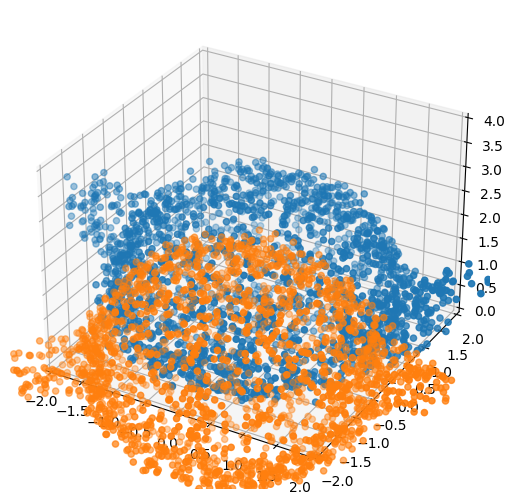

In [81]:
npz = np.load('HW1_P1.npz')
X = npz['X']
Y = npz['Y']
print(X)
print(X.shape)
compare_points(X, Y)  # noisy teapotsand

In [82]:
# copy-paste your hw0 solve module here
def hw0_solve(A, b, eps):
    x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    # print(x)

    # case 1: unconstraint least square
    if x.T @ x < eps:
        return x
    
    # case 2: linear search over lambda s. t. xTx-epsilon goes to 0 (xTx goes to epsilon)
    d, U = np.linalg.eigh(A.T@A) # SVD of A may be faster
    k = U.T@(A.T@b)
    def func(lam):
        return ((k / (d + 2 * lam))**2).sum() - eps
    def dfunc(lam):
        return -4 * ((k**2 / (d+2*lam)**3)).sum()
    
    # Newton, should converge in less than 10 iterations
    lam = 0
    while True:
        lam2 = lam - func(lam) / dfunc(lam)
        if abs(lam-lam2) < 1e-6:
            break
        lam = lam2
    x = U@(np.diag(1/(d + 2 * lam))@(U.T@(A.T@b)))
    return x

In [83]:
# Iterative solution to point-cloud alignment problem
# solve this problem here, and store your final results in R1
R1 = np.eye(3)
n = X.shape[1] # dataset size
# print(R1)
def skew(X):
    """
    Find skey-symmetric matrix of X
    """
    x1,x2,x3 = X[0],X[1],X[2]
    return np.array([[0,-x3,x2],[x3,0,-x1],[-x2,x1,0]])

for __ in range(100):
    # solve dw
    A = np.zeros((6000,3))
    for i in range(n):
        A[3*i:3*i+3, :] = - R1 @ skew(X[:,i])
    b = np.zeros((6000,1))
    for i in range(n):
        b[3*i:3*i+3, :] = np.expand_dims(Y[:,i] - R1 @ X[:,i], axis=1) 
    dw = hw0_solve(A, b, 0.01)
    # update R1
    w1, w2, w3 = dw[0][0], dw[1][0], dw[2][0]
    wskew = np.array([[0, -w3, w2], [w3, 0, -w1], [-w2, w1, 0]]) 
    R1 = np.dot(R1, np.eye(3) + wskew)
    # print(R1)

print("Completed R1:")
print(R1)

Completed R1:
[[-1.03309053  0.23970278  0.22846469]
 [-0.17768836  0.26768134 -1.00887162]
 [-0.27443643 -0.96125508 -0.29015662]]


array([[ 1.17416456, -0.03139511,  0.02286958],
       [-0.03139511,  1.05312204,  0.06362204],
       [ 0.02286958,  0.06362204,  1.15420894]])

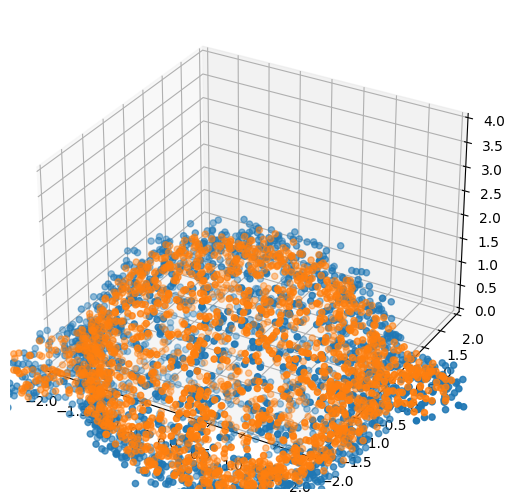

In [84]:
# Testing code, you should see the points of the 2 teapots roughly overlap
compare_points(R1@X, Y)
R1.T@R1

1.4.a:

$$p=\frac{1+i}{\sqrt{2}}, -p=\frac{-1-i}{\sqrt{2}}, q=\frac{1+j}{\sqrt{2}}, -q=\frac{-1-j}{\sqrt{2}}$$
$$
\theta_{-p} = 2 \arccos{-\frac{\sqrt{2}}{2}} = \frac{3 \pi}{2}, w_{-p} = \frac{1}{\sin{\frac{3 \pi}{4}}} [\frac{-1}{\sqrt{2}} \space 0 \space 0]^T = [-1 \space 0 \space 0]^T \\
=> \overrightarrow{w_{-p}} = w_{-p}\theta_{-p} = [\frac{-3\pi}{2} \space 0 \space 0]^T = \overrightarrow{w_{p}}  \\

\theta_{-q} = 2 \arccos{-\frac{\sqrt{2}}{2}} = \frac{3 \pi}{2}, w_{-q} = \frac{1}{\sin{\frac{3 \pi}{4}}} [0 \space \frac{-1}{\sqrt{2}} \space 0]^T = [0 \space -1 \space 0]^T \\
=> \overrightarrow{w_{-q}} = w_{-q}\theta_{-q} = [0 \space \frac{-3\pi}{2} \space 0]^T = \overrightarrow{w_{q}} 
$$

Statement: Quaternion pair $(r, -r)$ represents the same rotation. 

Proof: Suppose rotating vector $\overrightarrow{x}$ using quaternion r to get $R_r(\overrightarrow{x})$:

$$R_r(\overrightarrow{x}) = r \overrightarrow{x} r^{-1}$$

Now use $-r$, we get:

$$R_{-r}(\overrightarrow{x}) = -r \overrightarrow{x} -r^{-1} = (-1)^2 r \overrightarrow{x} r^{-1} = r \overrightarrow{x} r^{-1} = R_r(\overrightarrow{x})$$

Hence we proved that $R_r(\overrightarrow{x})$ has the same rotation with $R_{-r}(\overrightarrow{x})$.




1.4.b:

No. Since for each $(r, -r)$ having a large difference in domain (their quaternions $r$ and $-r$ are very different), they indeed yield the same rotation (the same ground truth), and hence the L2 difference learning can't give a prediction that is closed to both $r$ and $-r$, which is undesirable for both ground truths ($r$ and $-r$).
 

# 2 Geometry

2.1:
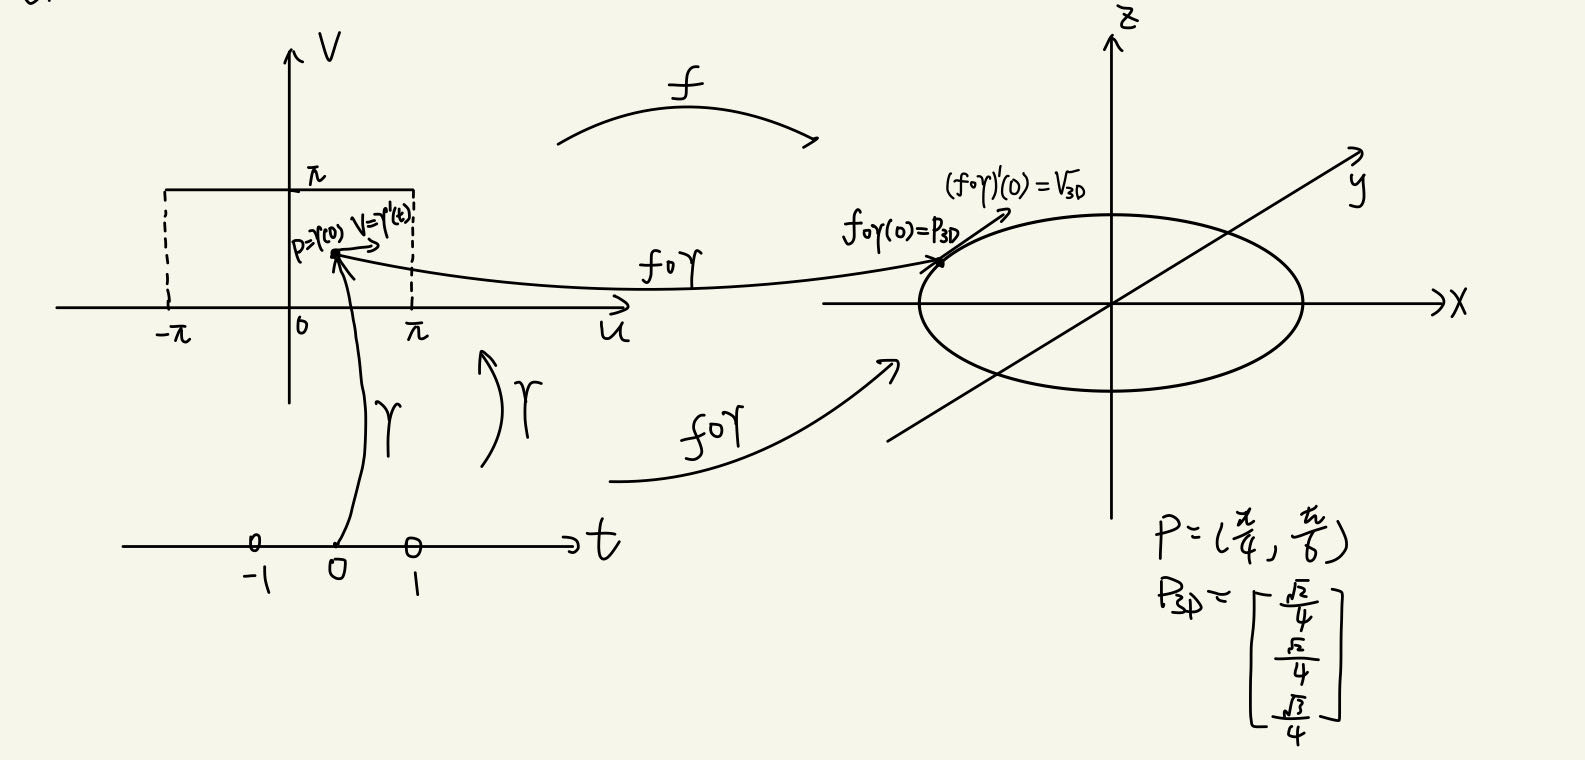

$P$: A point in the domain of $f$

$v$: 2D Velocity of $P$ in the domain

$\gamma$: A function mapping 1D input $t$ to a point in the domain

$f \circ \gamma$: A function mapping 1D input $t$ to a point in the 3D manifold

$(f \circ \gamma)^{'}(0)$: Velocity of $P_{3D}$, the point projected from $P$ to the 3D manifold, at $t$=0



2.2

In [85]:
a, b, c = 1, 1, 0.5

In [86]:
# These are some convenient functions to create open3d geometries and plot them
# The viewing direction is fine-tuned for this problem, you should not change them
import open3d
import math
import numpy as np
import matplotlib.pyplot as plt

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1e-4, 1))
    view_ctl.set_front((0, 0.5, 2))
    view_ctl.set_lookat((0, 0, 0))
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img)[::-1, ::-1])
    for g in geoms:
        vis.remove_geometry(g)
    
def create_arrow_from_vector(origin, vector):
    '''
    origin: origin of the arrow
    vector: direction of the arrow
    '''
    v = np.array(vector)
    v /= np.linalg.norm(v)
    z = np.array([0,0,1])
    angle = np.arccos(z@v)
    
    arrow = open3d.geometry.TriangleMesh.create_arrow(0.05, 0.1, 0.25, 0.2)
    arrow.paint_uniform_color([1,0,1])
    T = np.eye(4)
    T[:3, 3] = np.array(origin)
    T[:3,:3] = open3d.geometry.get_rotation_matrix_from_axis_angle(np.cross(z, v) * angle)
    arrow.transform(T)
    return arrow

def create_ellipsoid(a,b,c):
    sphere = open3d.geometry.TriangleMesh.create_sphere()
    sphere.transform(np.diag([a,b,c,1]))
    sphere.compute_vertex_normals()
    return sphere


def create_lines(points):
    lines = []
    for p1, p2 in zip(points[:-1], points[1:]):
        height = np.linalg.norm(p2-p1)
        center = (p1+p2) / 2
        d = p2-p1
        d /= np.linalg.norm(d)
        axis = np.cross(np.array([0,0,1]), d)
        axis /= np.linalg.norm(axis)
        angle = np.arccos(np.array([0,0,1]) @ d)
        R = open3d.geometry.get_rotation_matrix_from_axis_angle(axis * angle)
        
        T = np.eye(4)
        T[:3,:3]=R
        T[:3,3] = center
        cylinder = open3d.geometry.TriangleMesh.create_cylinder(0.02, height)
        cylinder.transform(T)
        cylinder.paint_uniform_color([1,0,0])
        lines.append(cylinder)
    return lines

TriangleMesh with 124 points and 240 triangles.


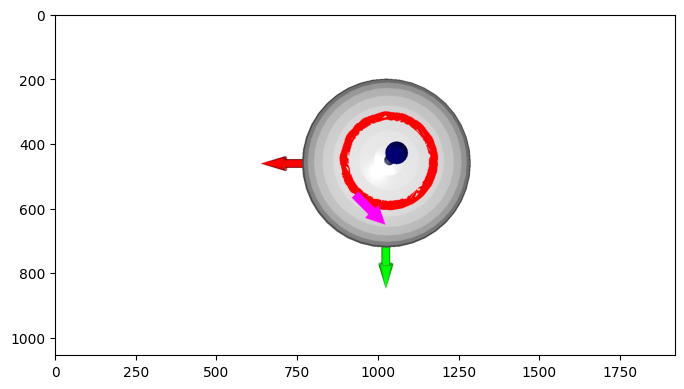

In [87]:
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)


# 2.2: Draw the 3D curve
pts = get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100)
# print(pts)
curve = create_lines(pts)

# 2.3.c: Draw Dfp(v) on the ellipsoid
arrow = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], \
                                 [-math.sqrt(2)/4, math.sqrt(2)/4, 0])

draw_geometries([ellipsoid, cf, arrow] + curve)

2.3.a:

$$Df_p = [\frac{\partial f}{\partial u} \space \frac{\partial f}{\partial v}]|_p = \left[ 
            \begin{array}{cc}
            -\sin{u}\sin{v} & \cos{u}\cos{v} \\ 
            \cos{u}\sin{v} & \sin{u}\cos{v} \\ 
            0 & -\frac{1}{2}\sin{v} \\
            \end{array} 
            \right] \\

$$

2.3.b:

$
Df_p = [\frac{\partial f}{\partial u} \space \frac{\partial f}{\partial v}] 
$
represents 2 3D vecetors spanning the tangent plane at $f(u,v)$

2.3.c:

TriangleMesh with 124 points and 240 triangles.


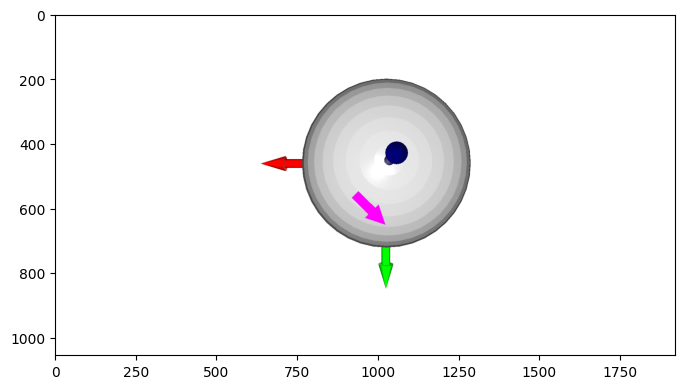

In [88]:
# Run the function definitions at 2.2 first before running the codes here!
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)

# 2.3.c: Draw Dfp(v) on the ellipsoid
arrow = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], \
                                 [-math.sqrt(2)/4, math.sqrt(2)/4, 0])

draw_geometries([ellipsoid, cf, arrow])

2.3.d:
$$
Df_{p=(\frac{\pi}{4}, \frac{\pi}{6})} = \left[ 
            \begin{array}{cc}
            -\frac{\sqrt(2)}{4} & \frac{\sqrt{6}}{4} \\ 
            \frac{\sqrt(2)}{4} & \frac{\sqrt{6}}{4} \\ 
            0 & -\frac{1}{4} \\
            \end{array} 
            \right] = [ \frac{\partial f}{\partial u}|_{(\frac{\pi}{4}, \frac{\pi}{6})} \quad \frac{\partial f}{\partial v}|_{(\frac{\pi}{4}, \frac{\pi}{6})} ] \\

N_{p=(\frac{\pi}{4}, \frac{\pi}{6})} = \frac{ \frac{\partial f}{\partial u}|_{(\frac{\pi}{4}, \frac{\pi}{6})} \times \frac{\partial f}{\partial v}|_{(\frac{\pi}{4}, \frac{\pi}{6})} }{ ||\frac{\partial f}{\partial u}|_{(\frac{\pi}{4}, \frac{\pi}{6})} \times \frac{\partial f}{\partial v}|_{(\frac{\pi}{4}, \frac{\pi}{6})}|| } = [\frac{-1}{\sqrt{26}} \quad \frac{-1}{\sqrt{26}} \quad \frac{-2\sqrt{3}}{\sqrt{13}} ]^T

$$

2.3.e:

TriangleMesh with 124 points and 240 triangles.


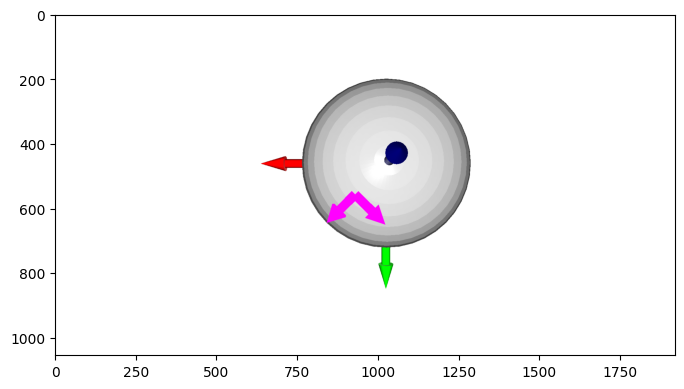

In [89]:
# Run the function definitions at 2.2 first before running the codes here!
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)

# 2.3.e: Draw orthonomal basis
arrowOrtho1 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], \
                                    [-1/math.sqrt(2), 1/math.sqrt(2), 0])
arrowOrtho2 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], \
                                    [math.sqrt(6)/math.sqrt(13), math.sqrt(6)/math.sqrt(13), -1/math.sqrt(13)])


draw_geometries([ellipsoid, cf, arrowOrtho1, arrowOrtho2])

2.4.a:

$$  

\begin{aligned}
\gamma(t) &= \int_0^t \gamma^{'}(t)dt \\
&= \gamma(0) + vt \\
&= [\frac{\pi}{4}+t \quad \frac{\pi}{6}]^T \\
=> Df_{u=\frac{\pi}{4}+t, v=\frac{\pi}{6}} &= \left[ 
            \begin{array}{cc}
            -\frac{\sin{(\frac{\pi}{4}+t)}}{2} &  \frac{\sqrt{3}}{2}\cos{(\frac{\pi}{4}+t)}\\ 
            \frac{\cos{(\frac{\pi}{4}+t)}}{2} & \frac{\sqrt{3}}{2}\sin{(\frac{\pi}{4}+t)} \\ 
            0 & -\frac{1}{4} \\
            \end{array} 
            \right] \\
            &= Df_t \\

S(t) &= \int_0^t ||g_{v}^{'}(t)|| dt \\
&= \int_0^t ||Df_t \cdot \gamma^{'}(t)|| dt \\
&= \int_0^t \sqrt{\frac{1}{4} (\sin^2(\frac{\pi}{4}+t)+\cos^2(\frac{\pi}{4}+t))} dt \\
&= \frac{t}{2}, \space t \in (-1, 1)

            




\end{aligned}

$$

2.4.b:

From (a) $=> t=2s, u=\frac{\pi}{4}+2s, v=\frac{\pi}{6}$, and we have $h_v(s) = [\frac{1}{2}cos(\frac{\pi}{4}+2s) \quad \frac{1}{2}sin(\frac{\pi}{4}+2s) \quad \frac{\sqrt{3}}{4} ]^T $


2.4.c:

$$
T_v(s) = \frac{\partial{h_v}}{\partial{s}} = [-sin(\frac{\pi}{4}+2s) \quad cos(\frac{\pi}{4}+2s) \quad 0]^T, \\
N_v(s) = \frac{\frac{\partial{T_v}}{\partial{s}}}{||\frac{\partial{T_v}}{\partial{s}}||} = [cos(\frac{\pi}{4}+2s) \quad sin(\frac{\pi}{4}+2s) \quad 0]^T,  \\
$$

So the curve normal is given as:

$$
N_v(0) = [\frac{1}{\sqrt{2}} \quad \frac{1}{\sqrt{2}} \quad 0]^T 
$$

Which is different from the normal at 3(d) given below when $s=0$:

$$
N_{p=(\frac{\pi}{4}, \frac{\pi}{6})} = [\frac{-1}{\sqrt{26}} \quad \frac{-1}{\sqrt{26}} \quad \frac{-2\sqrt{3}}{\sqrt{13}} ]^T
$$

2.5.a:

$$
\begin{aligned}
DN &= [\frac{\partial{N}}{\partial{u}} \quad \frac{\partial{N}}{\partial{v}}] \\
&= \left[ 
    \begin{array}{cc}
    \frac{sin(u)sin(v)}{(3cos^2(v)+1)^{\frac{1}{2}}} & \frac{-4cos(u)cos(v)}{(3cos^2(v)+1)^{\frac{3}{2}}} \\ 
    \frac{-sin(v)cos(u)}{(3cos^2(v)+1)^{\frac{1}{2}}} & \frac{-4sin(u)cos(v)}{(3cos^2(v)+1)^{\frac{3}{2}}} \\ 
    0 & \frac{2sin(v)}{(3cos^2(v)+1)^{\frac{3}{2}}} \\
    \end{array} 
    \right] \\


DN_{p=(\frac{\pi}{4}, \frac{\pi}{6})} &= \left[ 
    \begin{array}{cc}
    \frac{1}{\sqrt{26}}  & -\frac{8\sqrt{6}}{13\sqrt{13}} \\ 
    \frac{-1}{\sqrt{26}} & -\frac{8\sqrt{6}}{13\sqrt{13}} \\ 
    0 & \frac{8}{13\sqrt{13}} \\
    \end{array} 
    \right] \\

\end{aligned}
$$

2.5.b:

Denote $S = \left[ 
    \begin{array}{cc}
    s_1  & s_2 \\ 
    s_3 & s_4 \\ 
    \end{array} 
    \right] $: Let $DN_{p=(\frac{\pi}{4}, \frac{\pi}{6})} = Df_{p=(\frac{\pi}{4}, \frac{\pi}{6})} \cdot S$, where $Df_{p=(\frac{\pi}{4}, \frac{\pi}{6})}$ is mentioned at 2.3.d:

From $DN_p = Df_p S$ we have:

$$
\begin{aligned}
\frac{1}{\sqrt{26}} &= -\frac{\sqrt{2}}{4} s_1 + \frac{\sqrt{6}}{4} s_3 \\
\frac{-8\sqrt{6}}{13\sqrt{13}} &= -\frac{\sqrt{2}}{4} s_2 + \frac{\sqrt{6}}{4} s_4 \\
\frac{1}{\sqrt{26}} &= \frac{\sqrt{2}}{4} s_1 + \frac{\sqrt{6}}{4} s_3 \\
\frac{-8\sqrt{6}}{13\sqrt{13}} &= \frac{\sqrt{2}}{4} s_2 + \frac{\sqrt{6}}{4} s_4 \\
0 &= \frac{-1}{4} s_3 \\
\frac{8}{13\sqrt{13}} &= \frac{-1}{4} s_4
\end{aligned}
$$

Solving the above 6 equations yield: $s_1=\frac{-2}{\sqrt{13}}, s_2 = 0, s_3 = 0, s_4 = \frac{-32}{13\sqrt{13}}$

Hence $S = \left[ 
    \begin{array}{cc}
    \frac{-2}{\sqrt{13}} & 0 \\ 
    0 & \frac{-32}{13\sqrt{13}} \\ 
    \end{array} 
    \right] $ is diagonal with eigenvectors $s_1 = [1 \quad 0]^T$ and $s_2 = [0 \quad 1]^T$


2.5.c:

TriangleMesh with 124 points and 240 triangles.


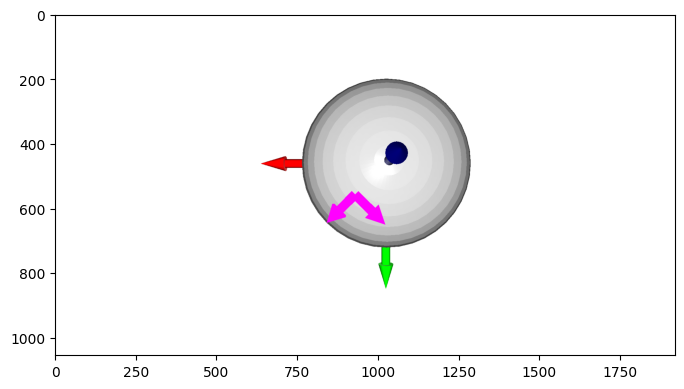

In [90]:
# Run the function definitions at 2.2 first before running the codes here!
import math
# exapmle code to draw ellipsoid, curve, and arrows
arrow = create_arrow_from_vector([0.,0.,1.], [1.,1.,0.])
# curve = create_lines(np.array([[1,1,1], [-1,1,1], [-1,-1,1], [1,-1,1], [1,1,1]], dtype=np.float64))
print(arrow)
ellipsoid = create_ellipsoid(a, b, c)
cf = open3d.geometry.TriangleMesh.create_coordinate_frame()
cf.scale(1.5, (0,0,0))

def get_3d_curve(p=np.array([math.pi/4, math.pi/6]), v=np.array([1, 0]), numPts=100):
    """
    Get the points for the curve of p moving with v
    p, v: 2D numpy arrays
    numPts: int
    """
    xRight = math.pi
    incr = (xRight - p[0]) / numPts # increment in domain for each point
    pts = []
    for i in range(numPts):
        p[0] = p[0] + incr*i
        u0, v0 = p[0], p[1]
        pts.append([math.cos(u0)*math.sin(v0), math.sin(u0)*math.sin(v0), 0.5*math.cos(v0)])
    return np.array(pts)

# 2.5.c: Draw principle curvature directions at 3D
arrowOrtho1 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], \
                                       [-math.sqrt(2)/4, math.sqrt(2)/4, 0])
arrowOrtho2 = create_arrow_from_vector([math.sqrt(2)/4, math.sqrt(2)/4, math.sqrt(3)/4], \
                                       [math.sqrt(6)/4, math.sqrt(6)/4, -1/4])

draw_geometries([ellipsoid, cf, arrowOrtho1, arrowOrtho2])

2.5.d: Orthogonal directions.

# 3 Mesh

3.1:

Denote the surface normal at $P$ to be $N_p$:

$$
\begin{aligned}
M_p N_p &= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta}t_{\theta}^{T}d\theta \cdot N_p \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta} (t_{\theta}^{T} \cdot N_p) d\theta  \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta} \cdot (0) d\theta  \quad (since \space t_{\theta} \perp N_p) \\
&= 0 \\

\end{aligned}
$$

Hence $N_p$ is an eigenvector of $M_p$ with eigenvalue $\lambda_1 = 0$.



3.2:

$$
\begin{aligned}

M_p T_1 &= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta}t_{\theta}^{T}d\theta \cdot T_1 \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta} (t_{\theta}^{T} \cdot T_1) d\theta  \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta} (\cos{\theta}) d\theta  \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} (\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (T_1(\cos{\theta})^2 + T_2(\sin{\theta}) \cos{\theta}) d\theta  \\
&= \frac{1}{2\pi} \{[\int_{-\pi}^{\pi} ((\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (\cos{\theta})^2)d\theta] T_1 + [\int_{-\pi}^{\pi} ((\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) \sin{\theta}\cos{\theta}) d\theta] T_2\} \quad  (1)\\
\end{aligned}
$$

Let $\psi(\theta)=(\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (\cos{\theta})^2$, $\psi(-\theta)=\psi(\theta) => \psi(\theta)$ is even.

Let $h(\theta)=(\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) \sin{\theta}\cos{\theta}$, $h(-\theta)=-h(\theta) => h(\theta)$ is odd. 

Hence we can further simplify the above equation $(1)$ to:

$$
\begin{aligned}
&= \frac{1}{\pi} \int^{\pi}_{0} (\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (\cos{\theta})^2 d\theta \cdot T_1 \\
&= (\frac{3}{8} \kappa_p^1 + \frac{1}{8} \kappa_p^2) \cdot T_1

\end{aligned}
$$

Hence $T_1$ is an eigenvector with eigenvalue $\frac{3}{8} \kappa_p^1 + \frac{1}{8} \kappa_p^2$.


$$
\begin{aligned}

M_p T_2 &= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta}t_{\theta}^{T}d\theta \cdot T_2 \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta} (t_{\theta}^{T} \cdot T_2) d\theta  \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} \kappa_p(t_{\theta})t_{\theta} (\sin{\theta}) d\theta  \\
&= \frac{1}{2\pi} \int_{-\pi}^{\pi} (\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (T_1\sin{\theta}\cos{\theta} + T_2(\sin{\theta})^2) d\theta  \\
&= \frac{1}{2\pi} \{[\int_{-\pi}^{\pi} ((\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) \sin{\theta} \cos{\theta})d\theta] T_1 + [\int_{-\pi}^{\pi} ((\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (\sin{\theta})^2) d\theta] T_2\} \quad  (2)\\
\end{aligned}
$$

Let $a(\theta)=(\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (\sin{\theta})^2$, $a(-\theta)=a(\theta) => a(\theta)$ is even.

Let $b(\theta)=(\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) \sin{\theta}\cos{\theta}$, $b(-\theta)=-b(\theta) => b(\theta)$ is odd. 

Hence we can further simplify the above equation $(2)$ to:

$$
\begin{aligned}
&= \frac{1}{\pi} \int^{\pi}_{0} (\kappa_p^1 (\cos{\theta})^2 + \kappa_p^2 (\sin{\theta})^2) (\sin{\theta})^2 d\theta \cdot T_2 \\
&= (\frac{1}{8} \kappa_p^1 + \frac{3}{8} \kappa_p^2) \cdot T_2

\end{aligned}
$$

Hence $T_2$ is an eigenvector with eigenvalue $\frac{1}{8} \kappa_p^1 + \frac{3}{8} \kappa_p^2$.



3.3:

In [91]:
# You may want to restart your notebook here, to reinitialize Open3D

import open3d
import numpy as np
import matplotlib.pyplot as plt

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

# Make sure you call this function to draw the points for proper viewing direction
def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1, 0))
    view_ctl.set_front((0, 2, 1))
    view_ctl.set_lookat((0, 0, 0))
    view_ctl.set_zoom(1)
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img))
    for g in geoms:
        vis.remove_geometry(g)

In [92]:
# R's method definition

def Rusinkiewicz(norms, verts, faces):
    # fetch vertex normals, coordinates, and faces
    pcurs, pdirs = np.zeros(shape=(len(faces), 2)), np.zeros(shape=(len(faces), 4)) # principal curvatures and directions
    # Rusinkiewicz's algorithm for computing the curvatures
    for i in range(len(faces)):
        # Solve S
        face = faces[i]
        p2, p0, p1 = verts[face[0]], verts[face[1]], verts[face[2]]
        n2, n0, n1 = norms[face[0]], norms[face[1]], norms[face[2]]
        e1, e2, e0 = p0-p2, p1-p0, p2-p1
        ksaiu = e2 / np.linalg.norm(e2)
        ksaiv = np.cross(n0, ksaiu)
        ksaiv /= np.linalg.norm(ksaiv)
        # print(ksaiu, ksaiv, ksaiu.shape, ksaiv.shape, ksaiu@ksaiv)
        
        Df = np.vstack((ksaiu, ksaiv)).T
        A = np.vstack((
                    np.concatenate(((Df.T@e0).T, np.array([0,0]))),  # 6*4 matrix
                np.concatenate((np.array([0,0]), (Df.T@e0).T)), 
                np.concatenate(((Df.T@e1).T, np.array([0,0]))), 
                np.concatenate((np.array([0,0]), (Df.T@e1).T)),
                np.concatenate(((Df.T@e2).T, np.array([0,0]))),
                np.concatenate((np.array([0,0]), (Df.T@e2).T))
                ))
        b = np.concatenate((Df.T@(n2-n1), 
                    Df.T@(n0-n2), 
                    Df.T@(n1-n0))).T # 6*1 matrix
        # print(A, A.shape)
        # print(b, b.shape)
        s, _, _, _ = np.linalg.lstsq(A, b, rcond=None) # S = [[s1,s2],[s3,s4]] flattened to [s1,s2,s3,s4] and solved
        S = np.vstack((s[0:2], s[2:])) # 4*4 S matrix recovered
        # Eigen-decompose S to get principal directions and curvatures
        fpcurs, fpdirs = np.linalg.eig(S)
        if (fpcurs[0] < fpcurs[1]): # Align to Kmax, Kmin
            fpcurs[0], fpcurs[1] = np.copy(fpcurs[1]), np.copy(fpcurs[0])
            fpdirs[:,0], fpdirs[:,1] = np.copy(fpdirs[:,1]), np.copy(fpdirs[:,0])
        # update the principal curvature set
        pcurs[i] = fpcurs
        pdirs[i] = np.concatenate((fpdirs[:,0].T, fpdirs[:,1].T))
    return pcurs, pdirs

<trimesh.Trimesh(vertices.shape=(10201, 3), faces.shape=(20000, 3), name=`sievert.obj`)>
Principal curvatures ((Kmax, Kmin) corresponding to       max and min curvatures):
[[ 1.16586428e-13 -1.16125901e-02]
 [-4.67985026e-14 -1.16334043e-02]
 [-3.63944985e-14 -1.17763662e-02]
 ...
 [ 6.96977198e-14 -4.73133049e-02]
 [ 1.34822709e-13 -5.76065985e+00]
 [ 1.33336051e-13 -3.55466334e-02]]
(20000, 2)
Principal directions in 2D ((x1, y1, x2, y2) where x1, y1       corresponding to Kmax, and x2, y2 corresponding to Kmin):
[[ 0.03422705 -0.99941408 -0.11111641  0.9938074 ]
 [-0.03454718 -0.99940307 -0.11175038 -0.99373631]
 [-0.03419781 -0.99941508 -0.11259544 -0.99364091]
 ...
 [-0.03495435 -0.99938891 -0.10076161 -0.9949106 ]
 [-0.02862704 -0.99959016 -0.88922524  0.45746963]
 [-0.02848466 -0.99959423 -0.09610212  0.99537148]]
(20000, 4)


Text(0.5, 1.0, "Sievert's surface")

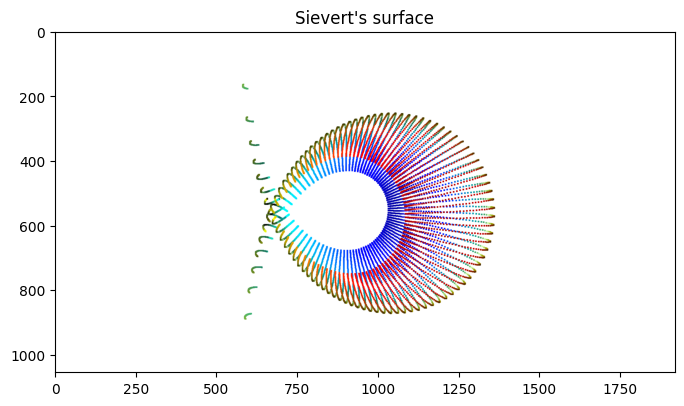

In [93]:
# Principal curvature computations for sievert.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

mesh = trimesh.load('sievert.obj')
print(mesh)
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))

# fetch vertex normals, coordinates, and faces
verts = np.asarray(pcd.points)
norms = np.asarray(pcd.normals)
faces = mesh.faces

# Apply R's method to get principal curvatures
pcursSie, pdirsSie = Rusinkiewicz(norms, verts, faces)

print("Principal curvatures ((Kmax, Kmin) corresponding to \
      max and min curvatures):")
print(pcursSie)
print(pcursSie.shape)
print("Principal directions in 2D ((x1, y1, x2, y2) where x1, y1 \
      corresponding to Kmax, and x2, y2 corresponding to Kmin):")
print(pdirsSie)
print(pdirsSie.shape)

draw_geometries([pcd])
plt.title("Sievert's surface")








<trimesh.Trimesh(vertices.shape=(61432, 3), faces.shape=(20480, 3), name=`icosphere.obj`)>
Principal curvatures ((Kmax, Kmin) corresponding to       max and min curvatures):
[[1.197281   1.08617268]
 [1.2637722  0.89339637]
 [1.56127018 1.22152556]
 ...
 [1.12145781 0.8692251 ]
 [1.31803086 0.73781594]
 [1.21171006 1.21171006]]
(20480, 2)
Principal directions in 2D ((x1, y1, x2, y2) where x1, y1       corresponding to Kmax, and x2, y2 corresponding to Kmin):
[[ 0.99999782  0.00208966  0.95085472  0.30963738]
 [ 0.99977965 -0.02099193  0.0565818   0.99839797]
 [ 0.65196255 -0.75825117 -0.98895485 -0.1482171 ]
 ...
 [ 0.15666677 -0.98765152 -0.59521006 -0.80357015]
 [ 0.99864915 -0.05196024  0.00569803  0.99998377]
 [-0.35240925  0.9340836  -0.35240925  0.9340836 ]]
(20480, 4)


Text(0.5, 1.0, "icosphere's surface")

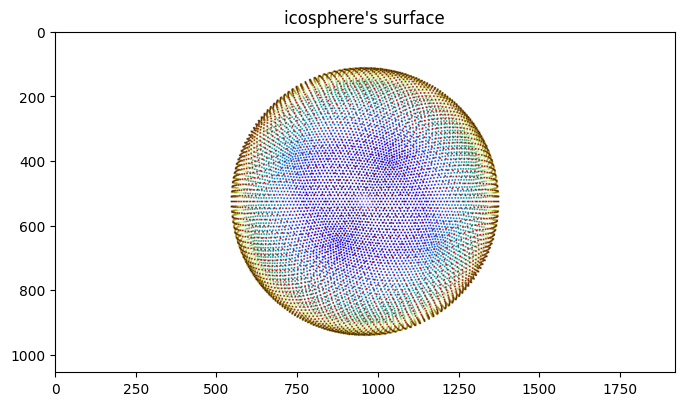

In [94]:
# Principal curvature computations for icosphere.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

mesh = trimesh.load('icosphere.obj')
print(mesh)
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))

# fetch vertex normals, coordinates, and faces
verts = np.asarray(pcd.points)
norms = np.asarray(pcd.normals)
faces = mesh.faces

# Apply R's method to get principal curvatures
pcursSph, pdirsSph = Rusinkiewicz(norms, verts, faces)

print("Principal curvatures ((Kmax, Kmin) corresponding to \
      max and min curvatures):")
print(pcursSph)
print(pcursSph.shape)
print("Principal directions in 2D ((x1, y1, x2, y2) where x1, y1 \
      corresponding to Kmax, and x2, y2 corresponding to Kmin):")
print(pdirsSph)
print(pdirsSph.shape)

draw_geometries([pcd])
plt.title("icosphere's surface")

3.4:

In [95]:
# Function defs of Gaussian and Mean Curvature computations for sievert.obj
import open3d
import trimesh
import warnings
warnings.filterwarnings("ignore")

def curvature_to_Gaussian(curv):
    "Convert to Gaussian curvature"
    return curv[:,0]*curv[:,1]

def curvature_to_Mean(curv):
    "Convert to Mean curvature"
    return (curv[:,0]+curv[:,1])/2


In [96]:
# Gaussian and Mean curvature computations for icosphere.obj and sievert.obj (run the previous cells to get curvatures first!)

pGauSph = curvature_to_Gaussian(pcursSph)
pGauSie = curvature_to_Gaussian(pcursSie)
pMeanSph = curvature_to_Mean(pcursSph)
pMeanSie = curvature_to_Mean(pcursSie)
print("Gaussian curvatures for icosphere.obj:")
print(pGauSph)
print("Gaussian curvatures for sievert.obj:")
print(pGauSie)
print("Mean curvatures for icosphere.obj:")
print(pMeanSph)
print("Mean curvatures for sievert.obj:")
print(pMeanSie)

Gaussian curvatures for icosphere.obj:
[1.30045391 1.1290495  1.90713144 ... 0.97479927 0.97246418 1.46824127]
Gaussian curvatures for sievert.obj:
[-1.35387040e-15  5.44425903e-16  4.28594941e-16 ... -3.29762947e-15
 -7.76667765e-13 -4.73964771e-15]
Mean curvatures for icosphere.obj:
[1.14172684 1.07858429 1.39139787 ... 0.99534145 1.0279234  1.21171006]
Mean curvatures for sievert.obj:
[-0.0058063  -0.0058167  -0.00588818 ... -0.02365665 -2.88032993
 -0.01777332]


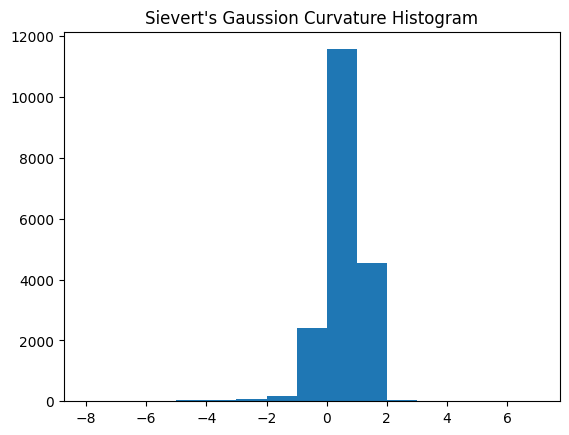

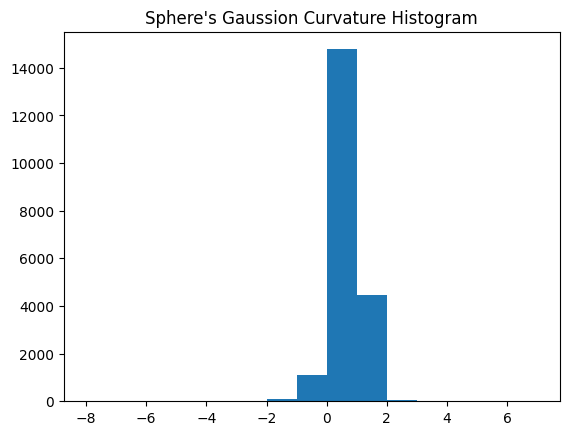

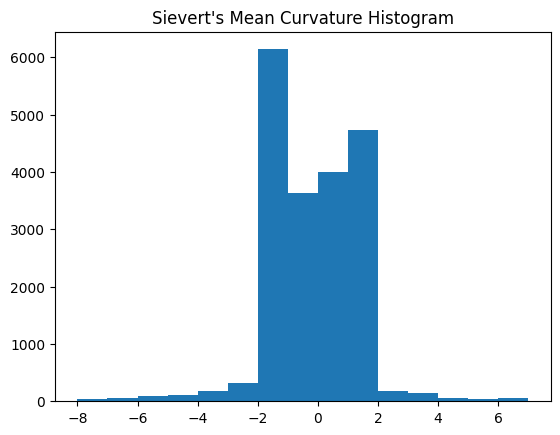

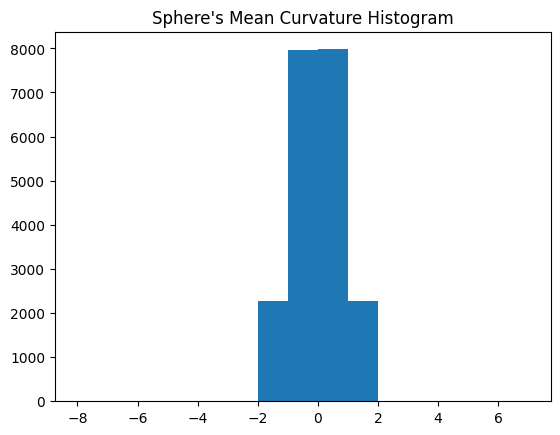

In [97]:
# Comparing Mean and Gaussian curvatures of icosphere.obj and sievert.obj 
# (Run the above 2 Gaussian and Mean curvature computations first before running this cell!) 
from matplotlib import pyplot as plt 
import numpy as np  
fig = plt.figure()

# Gaussian plots:
# For Sievert's surface
plt.hist(pGauSie, bins = range(-8, 8, 1)) 
plt.title("Sievert's Gaussion Curvature Histogram") 
plt.show()
 
# For Sphere's surface
plt.hist(pGauSph, bins = range(-8, 8, 1)) 
plt.title("Sphere's Gaussion Curvature Histogram") 
plt.show()
# We see that the Gaussian Curvature histograms of the two objects are roughly the same,
# which verifies that they're isometric.

# Mean plots:
# For Sievert's surface
# print(len(pMeanSie))
plt.hist(pMeanSie, bins = range(-8, 8, 1)) 
plt.title("Sievert's Mean Curvature Histogram") 
plt.show()
 
# For Sphere's surface
# print(len(pMeanSph))
plt.hist(pMeanSph, bins = range(-8, 8, 1)) 
plt.title("Sphere's Mean Curvature Histogram") 
plt.show()


# 4 Point Cloud

4.1:

In [98]:
# These are some convenient functions to create open3d geometries and plot them
# The viewing direction is fine-tuned for this problem, you should not change them
import open3d
import math
import numpy as np
import matplotlib.pyplot as plt

vis = open3d.visualization.Visualizer()
vis.create_window(visible = False)

def draw_geometries(geoms):
    for g in geoms:
        vis.add_geometry(g)
    view_ctl = vis.get_view_control()
    view_ctl.set_up((0, 1e-4, 1))
    view_ctl.set_front((0, 0.5, 2))
    view_ctl.set_lookat((0, 0, 0))
    # do not change this view point
    vis.update_renderer()
    img = vis.capture_screen_float_buffer(True)
    plt.figure(figsize=(8,6))
    plt.imshow(np.asarray(img)[::-1, ::-1])
    for g in geoms:
        vis.remove_geometry(g)


Sampled 100K points:
[[ 0.4666489   0.54707479 -0.97690362]
 [-0.8447135  -0.44934622 -0.50869453]
 [ 0.44529958 -0.39383187  0.12025959]
 ...
 [ 0.32206893 -0.043264    0.28268161]
 [-0.80940607 -0.88490067 -0.08279984]
 [-0.58706528 -0.05346066 -0.54113807]]
(100000, 3)
Sampled 100K points' indices:
[ 696 1271  187 ...  886  590  521]
(100000,)


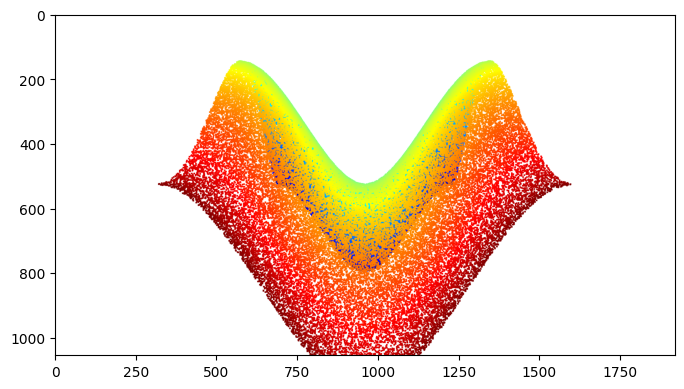

In [99]:
# Sample 100K points from saddle.obj
import trimesh
import trimesh.sample

Nsamples = 100000
mesh = trimesh.load_mesh("saddle.obj")
pts, ptinds = trimesh.sample.sample_surface(mesh, Nsamples, seed=1)

print("Sampled 100K points:")
print(pts)
print(pts.shape)
print("Sampled 100K points' indices:")
print(ptinds)
print(ptinds.shape)


pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(pts)
draw_geometries([pcd])


4.2

  0%|          | 0/4000 [00:00<?, ?it/s]

100%|██████████| 4000/4000 [00:14<00:00, 269.02it/s]


Sampled 4K points:
[[ 4.66648899e-01  5.47074793e-01 -9.76903621e-01]
 [-9.94262176e-01  4.21190122e-04  9.96173964e-01]
 [ 9.96549144e-01 -5.86438268e-02  8.53244279e-01]
 ...
 [ 7.79742173e-01 -8.43722450e-01  1.10400391e-01]
 [-4.11577570e-02  3.87159903e-01  4.26708900e-01]
 [-4.62089705e-01  5.15203100e-01 -8.38720485e-01]]
(4000, 3)


Text(0.5, 1.0, 'After downsampling')

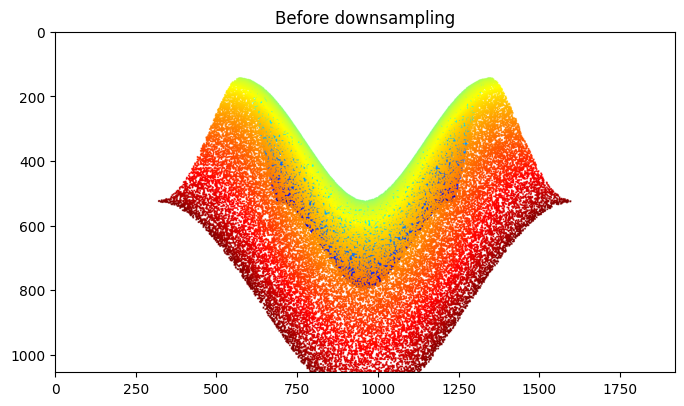

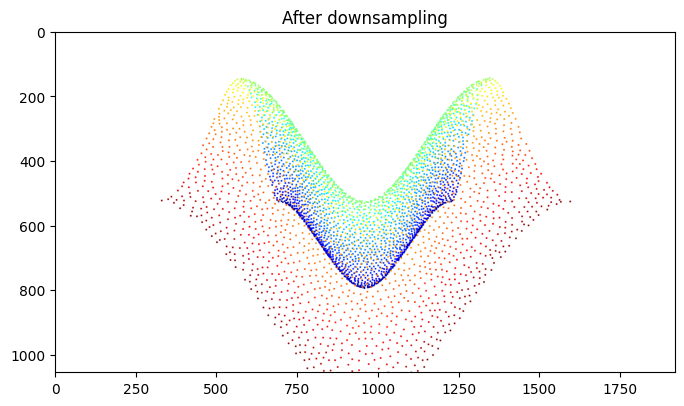

In [100]:
# Sample 4K points from the 100K ones using Iterative Farthest Sampling
import trimesh
import trimesh.sample
from tqdm import tqdm

Nsamples = 100000
Ndnsamps = 4000
mesh = trimesh.load_mesh("saddle.obj")
pts, ptinds = trimesh.sample.sample_surface(mesh, Nsamples, seed=1)

# union points -> compute distance -> take min for set distance
def fps_downsample(points, number_of_points_to_sample):
    selected_points = np.zeros((number_of_points_to_sample, 3))
    dist = np.ones(points.shape[0]) * np.inf # distance to the selected set
    for i in tqdm(range(number_of_points_to_sample)):
        # pick the point with max dist
        idx = np.argmax(dist)
        selected_points[i] = points[idx]
        dist_ = ((points - selected_points[i]) ** 2).sum(-1)
        dist = np.minimum(dist, dist_)
    return selected_points

samp_pts = fps_downsample(pts, Ndnsamps)

print("Sampled 4K points:")
print(samp_pts)
print(samp_pts.shape)

pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(pts)
draw_geometries([pcd])
plt.title("Before downsampling")

pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(samp_pts)
draw_geometries([pcd])
plt.title("After downsampling")


4.3:

In [101]:
# Estimate normals for the 4K points 
# (Run the previous cell to get sampled points first, before running this one!)
import trimesh
import trimesh.sample
from tqdm import tqdm
from sklearn.decomposition import PCA

Nsamples = 100000
mesh = trimesh.load_mesh("saddle.obj")
pts, ptinds = trimesh.sample.sample_surface(mesh, Nsamples, seed=1)
Ndnsamps = 4000
samp_pts = samp_pts

def find_near_k_pts(pt, pts, k):
    """
    Find 50 nearest points (not necessarily ordered) to pt in pts, and return the 50*3 matrix.
    """
    dist_ = ((pts - pt) ** 2).sum(-1)
    idx = np.argpartition(dist_, k)
    return pts[idx[:k]]

def esti_norm_PCA(samp_pts_near_50):
    """
    Estimate a normal given 50 points, using PCA, and return 1*3 normal vector estimation.
    """
    M = np.zeros((3,3))
    xbar = np.mean(samp_pts_near_50, axis=0) 
    for xi in samp_pts_near_50:
        M += np.outer(xi-xbar, xi-xbar)
    # PCA on M to get w, corresponding to the 3rd principal component
    pca = PCA(3)
    pca.fit(M)
    # print(pca.components_) 
    # print(pca.singular_values_) 
    norm = pca.components_[:,-1] # Fetch the third principal component to be the normal
    if (norm@np.array([0,1,0]) < 0): # Align to Y axis
        norm = -norm
    return norm


def esti_norms(samp_pts):
    Ndnsamps = samp_pts.shape[0]
    norms = np.zeros((Ndnsamps, 3))
    for i in tqdm(range(Ndnsamps)):
        samp_pts_near_50 = find_near_k_pts(samp_pts[i], np.asarray(mesh.vertices), 50)
        norm = esti_norm_PCA(samp_pts_near_50)
        norms[i] = norm
    return norms

norms = esti_norms(samp_pts)
print("Estimated normals:")
print(norms.shape)
print(norms)


  0%|          | 0/4000 [00:00<?, ?it/s]

100%|██████████| 4000/4000 [00:02<00:00, 1411.96it/s]

Estimated normals:
(4000, 3)
[[-0.02396244  0.91208134  0.40930847]
 [ 0.42111041  0.68200905  0.59793785]
 [-0.31124628  0.7920378  -0.52516843]
 ...
 [-0.39081875  0.9024415  -0.1812734 ]
 [ 0.39850363  0.27458315 -0.87509939]
 [ 0.51612205  0.67592656  0.52606208]]


4.4: I use the Poisson Surface Reconstruction algorithm to first reconstruct the Mesh, which contains the essential face information for Rusinkiewicz's method curvature estimation, from the Point Cloud. Then I estimate the curvatures based on the Mesh (the face, vertex, and normal information inside) generated. 

In [102]:
# Function definition of sample 4K points from the 100K ones using Iterative Farthest Sampling
import trimesh
import trimesh.sample
from tqdm import tqdm

Nsamples = 100000
Ndnsamps = 4000
mesh = trimesh.load_mesh("saddle.obj")
pts, ptinds = trimesh.sample.sample_surface(mesh, Nsamples, seed=1)

samp_pts = samp_pts
norms = norms

# union points -> compute distance -> take min for set distance
def fps_downsample(points, number_of_points_to_sample):
    selected_points = np.zeros((number_of_points_to_sample, 3))
    dist = np.ones(points.shape[0]) * np.inf # distance to the selected set
    for i in tqdm(range(number_of_points_to_sample)):
        # pick the point with max dist
        idx = np.argmax(dist)
        selected_points[i] = points[idx]
        dist_ = ((points - selected_points[i]) ** 2).sum(-1)
        dist = np.minimum(dist, dist_)
    return selected_points


In [103]:
# Function definition of R's method.
import warnings
warnings.filterwarnings("ignore")

samp_pts = samp_pts
norms = norms

def Rusinkiewicz(norms, verts, faces):
    # fetch vertex normals, coordinates, and faces
    pcurs, pdirs = np.zeros(shape=(len(faces), 2)), np.zeros(shape=(len(faces), 4)) # principal curvatures and directions

    # Rusinkiewicz's algorithm for computing the curvatures
    for i in range(len(faces)):
        # Solve S
        face = faces[i]
        p2, p0, p1 = verts[face[0]], verts[face[1]], verts[face[2]]
        n2, n0, n1 = norms[face[0]], norms[face[1]], norms[face[2]]
        e1, e2, e0 = p0-p2, p1-p0, p2-p1
        ksaiu = e2 / np.linalg.norm(e2)
        ksaiv = np.cross(n0, ksaiu)
        ksaiv /= np.linalg.norm(ksaiv)
        # print(ksaiu, ksaiv, ksaiu.shape, ksaiv.shape, ksaiu@ksaiv)
        
        Df = np.vstack((ksaiu, ksaiv)).T
        # print(Df, Df.shape)
        # print(np.concatenate(((Df.T@e0).T, np.array([0,0]))))
        A = np.vstack((
                    np.concatenate(((Df.T@e0).T, np.array([0,0]))),  # 6*4 matrix
                np.concatenate((np.array([0,0]), (Df.T@e0).T)), 
                np.concatenate(((Df.T@e1).T, np.array([0,0]))), 
                np.concatenate((np.array([0,0]), (Df.T@e1).T)),
                np.concatenate(((Df.T@e2).T, np.array([0,0]))),
                np.concatenate((np.array([0,0]), (Df.T@e2).T))
                ))
        b = np.concatenate((Df.T@(n2-n1), 
                    Df.T@(n0-n2), 
                    Df.T@(n1-n0))).T # 6*1 matrix
        # print(A, A.shape)
        # print(b, b.shape)
        s, _, _, _ = np.linalg.lstsq(A, b, rcond=None) # S = [[s1,s2],[s3,s4]] flattened to [s1,s2,s3,s4] and solved
        S = np.vstack((s[0:2], s[2:])) # 4*4 S matrix recovered
        # Eigen-decompose S to get principal directions and curvatures
        fpcurs, fpdirs = np.linalg.eig(S)
        if (fpcurs[0] < fpcurs[1]): # Align to Kmax, Kmin
            fpcurs[0], fpcurs[1] = np.copy(fpcurs[1]), np.copy(fpcurs[0])
            fpdirs[:,0], fpdirs[:,1] = np.copy(fpdirs[:,1]), np.copy(fpdirs[:,0])
        # update the principal curvature set
        pcurs[i] = fpcurs
        # print(fpdirs[:,0].T, fpdirs[:,0].T.shape)
        pdirs[i] = np.concatenate((fpdirs[:,0].T, fpdirs[:,1].T))
    return pcurs, pdirs

def curvature_to_Gaussian(curv):
    "Convert to Gaussian curvature"
    # print(curv)
    return curv[:,0]*curv[:,1]

def curvature_to_Mean(curv):
    "Convert to Mean curvature"
    # print(curv)
    return (curv[:,0]+curv[:,1])/2


  0%|          | 0/4000 [00:00<?, ?it/s]

100%|██████████| 4000/4000 [00:13<00:00, 287.94it/s]


Down-sampling 4K points finished


100%|██████████| 4000/4000 [00:02<00:00, 1441.14it/s]


Normal estimations for the 4K points finished
Poisson Surface Reconstruction started!
Poisson Surface Reconstruction finished!
Rusinkiewicz's curvature estimation started!
Rusinkiewicz's curvature estimation finished!
Generating Gaussian histogram...


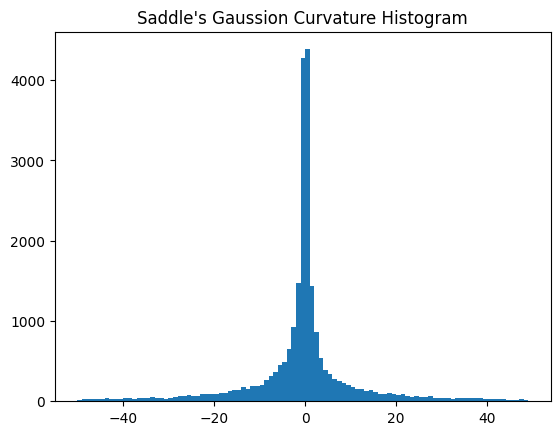

In [104]:
# R's method on Point Cloud 
# (Run the previous cells to get sampled points and estimated normals first, before running this one!)
import trimesh
import open3d as o3d
import trimesh.sample
from tqdm import tqdm
from sklearn.decomposition import PCA

# fetch sampled 4k points and the normals
Nsamples = 100000
Ndnsamps = 4000
mesh = trimesh.load_mesh("saddle.obj")
pts, ptinds = trimesh.sample.sample_surface(mesh, Nsamples, seed=1)
samp_pts = fps_downsample(pts, Ndnsamps)
print("Down-sampling 4K points finished")
norms = esti_norms(samp_pts)
print("Normal estimations for the 4K points finished") 

# Init the sampled Point Cloud
pcd = open3d.geometry.PointCloud()
pcd.points = open3d.utility.Vector3dVector(samp_pts)
# pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))
pcd.normals = open3d.utility.Vector3dVector(norms)
# print(len(samp_pts))

# Reconstruct the Mesh using the Poisson Surface Reconstruction method
print("Poisson Surface Reconstruction started!") 
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd,depth=6)
print("Poisson Surface Reconstruction finished!") 

# Re-construct the point cloud since some vertex interpolations are done
re_pcd = open3d.geometry.PointCloud()
re_pcd.points = open3d.utility.Vector3dVector(mesh.vertices)
re_pcd.estimate_normals(open3d.geometry.KDTreeSearchParamKNN(knn=50))
re_pcd.orient_normals_to_align_with_direction(np.array([0.0, 1.0, 0.0]))

# Compute curvatures using the mesh, by R's method
# print(mesh)
faces = np.asarray(mesh.triangles)
verts = np.asarray(re_pcd.points)
norms = np.asarray(re_pcd.normals)

# faces = mesh.faces
print("Rusinkiewicz's curvature estimation started!") 
pcurs, pdirs = Rusinkiewicz(norms, verts, faces)
print("Rusinkiewicz's curvature estimation finished!") 
pGauSad = curvature_to_Gaussian(pcurs)
print("Generating Gaussian histogram...") 
plt.hist(pGauSad, bins = range(-50, 50, 1)) 
plt.title("Saddle's Gaussion Curvature Histogram") 
plt.show()



# 5 Feedbacks

5.1: A week. Working at least 6 hours on this per day.

5.2: At very least 36 hours.

5.3: Hopefully we can have more time for the assignments (since they're indeed a lot), and hopefully the grades will be given more leniently eventually. I can learn a lot though the assignments are tough.